<a href="https://colab.research.google.com/github/Nidhi3624/NFC3_Innov8ers/blob/main/Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
crop_data = pd.read_csv('crop_recommendation.csv')
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop_data.shape

(2200, 8)

In [10]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [15]:
crop_data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
crop_data.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [19]:
crop_data["label"].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [20]:
#separating features and target label

In [21]:
features = crop_data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop_data['label']
labels = crop_data['label']

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size = 0.2, random_state =2)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [26]:
YPred = DTree_clf.predict(Xtest)

In [28]:
print("Accuracy:", accuracy_score(Ytest, YPred))
print("Classification Report:\n", classification_report(Ytest, YPred))
print("Confusion Matrix:\n", confusion_matrix(Ytest, YPred))


Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.95      0.91      0.93        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.

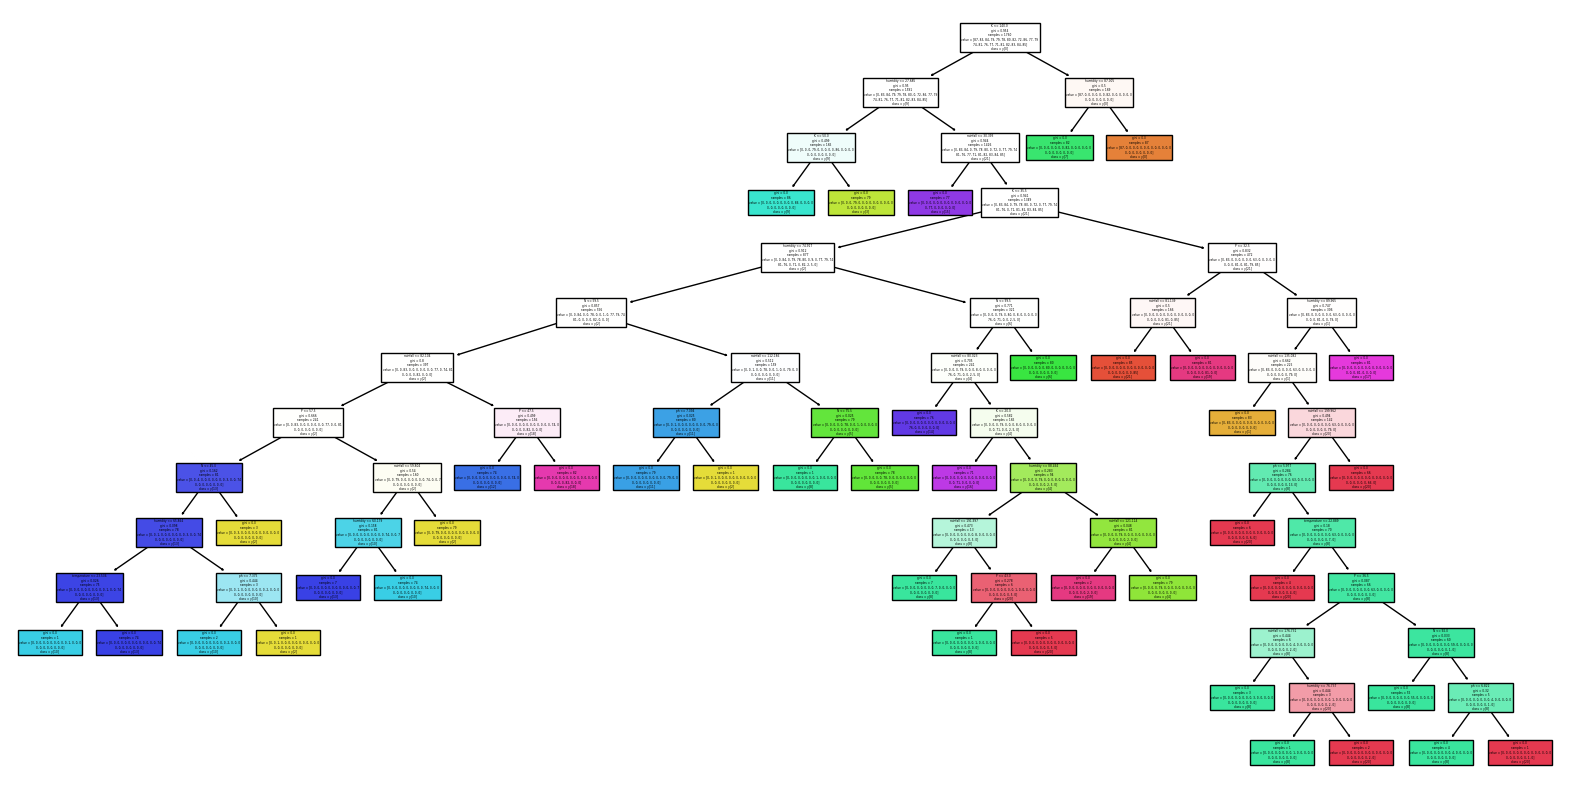

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(DTree_clf, filled=True, feature_names=crop_data.columns, class_names=True)
plt.show()


**Gaussian Naive Bayes**

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [39]:
GNB = GaussianNB()
GNB.fit(Xtrain, Ytrain)

GaussianNB()

In [40]:
GNB_Ypred = GNB.predict(Xtest)

In [42]:
print("Accuracy:", accuracy_score(Ytest, GNB_Ypred))
print("Classification Report:\n", classification_report(Ytest, GNB_Ypred))
print("Confusion Matrix:\n", confusion_matrix(Ytest, GNB_Ypred))


Accuracy: 0.990909090909091
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      

**Support Vector Machine**

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
mySVC = SVC()
mySVC.fit(Xtrain, Ytrain)

SVC()

In [46]:
SVC_Ypred = mySVC.predict(Xtest)

In [47]:
print("Accuracy:", accuracy_score(Ytest, SVC_Ypred))
print("Classification Report:\n", classification_report(Ytest, SVC_Ypred))
print("Confusion Matrix:\n", confusion_matrix(Ytest, SVC_Ypred))

Accuracy: 0.9772727272727273
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00     

So we can see the accuracy of Naive Bayes Classifier is highest hence we'll use the Naive Bayes Classifier model for training the data.

**Saving the Naive Bayes Classifier Model**

In [48]:
import joblib
joblib.dump(GNB, "Crop_REcommendation_Model.pkl")

['Crop_REcommendation_Model.pkl']